In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Cargamos el archivo
df = pd.read_csv("archive/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
#Variables esatdisticas
df.describe()
#median_income esta en decenas de miles de dolares 3 serian 30 mil dolares
#viene de un distrito de casa 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
#smotramos el numero de filas que tenemos en el data frame
df.shape

(20640, 10)

In [5]:
#Tipo de variables con las que trabajaremos
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [6]:
#cambiaremos estos datos a numericos
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
indexAge = df[ (df['ocean_proximity'] == 'ISLAND')].index# | (df['Position'] == 'SG') ].index
df.drop(indexAge , inplace=True)
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: ocean_proximity, dtype: int64

<AxesSubplot:>

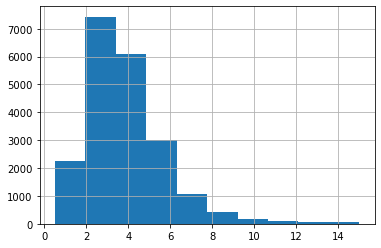

In [8]:
#Histograma de como esta la distribucion de la info
df["median_income"].hist()

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

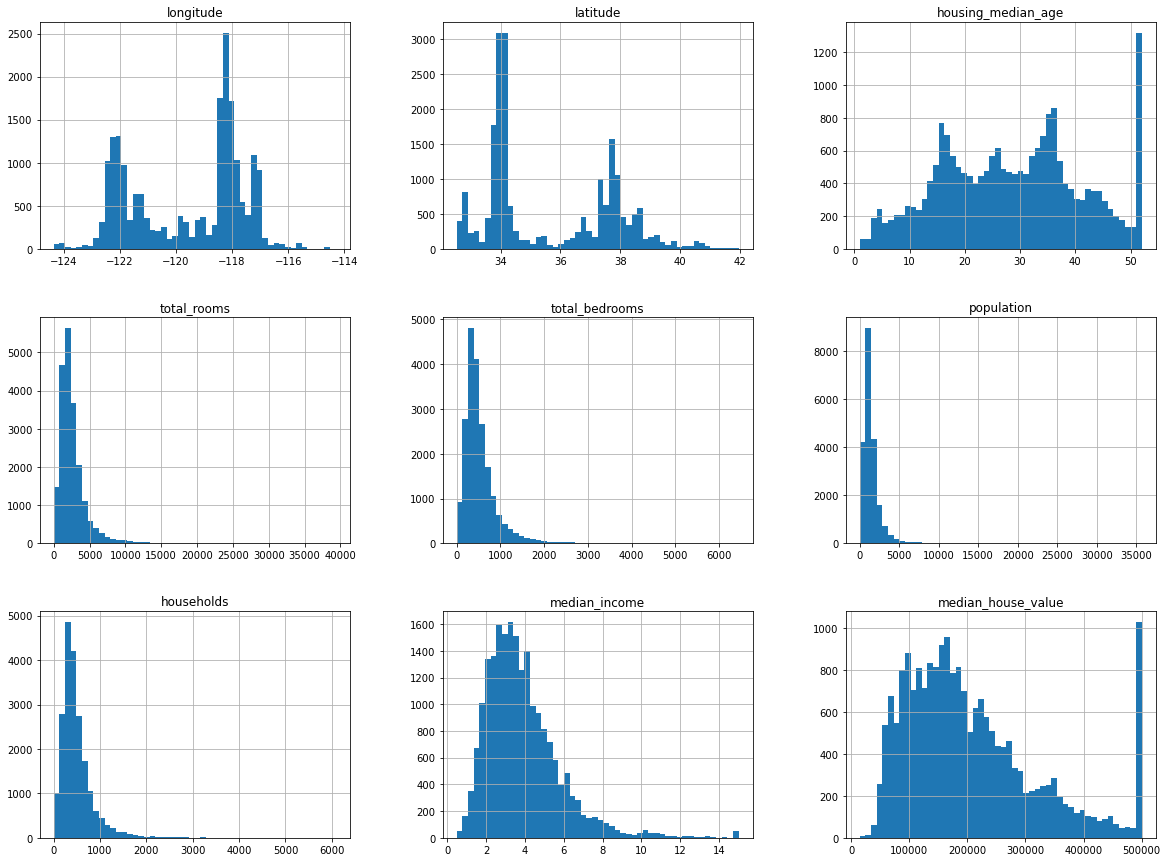

In [9]:
df.hist(bins=50,figsize=(20,15))

# Mapa del estado de california
## Sin Folium

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

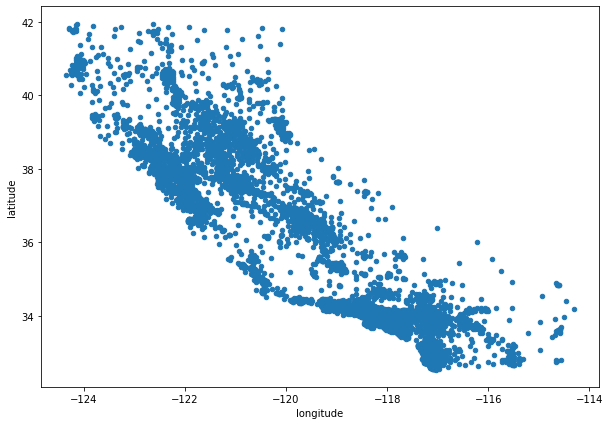

In [10]:
#Grafica de disporcion
df.plot(kind='scatter',x='longitude',y='latitude',figsize=(10,7))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

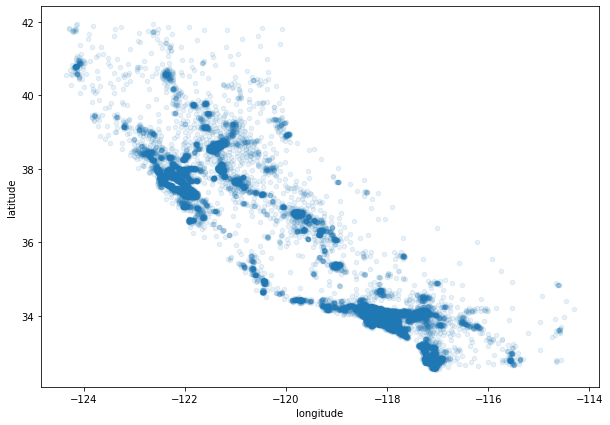

In [11]:
#agregar opcion alpha
df.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1,figsize=(10,7))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

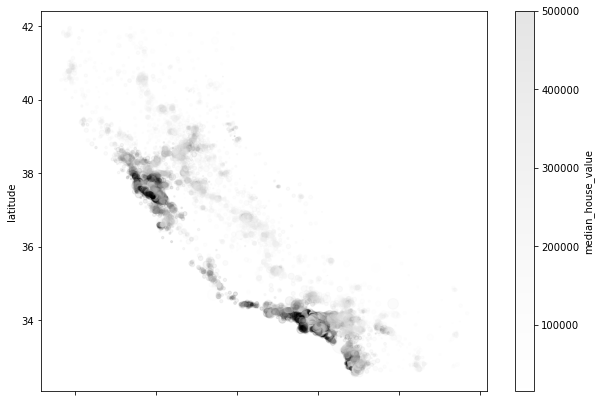

In [12]:
#Agregar tamaño del punto y la cantidad de poblacion (Media promedio del valor de las casas)
#S: Tamaño de punto
#C: Etiqueta
df.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1,figsize=(10,7),
       s=df["population"]/100,c='median_house_value', colorbar=True
       )

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

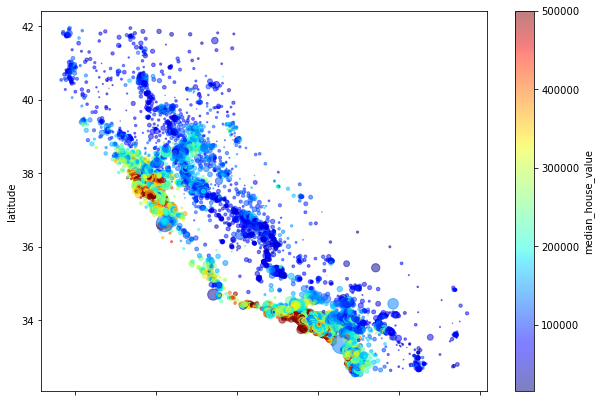

In [13]:
#pip install colorspacious
df.plot(kind='scatter',x='longitude',y='latitude',alpha=0.5,figsize=(10,7),
       s=df["population"]/100,c='median_house_value', colorbar=True, cmap=plt.get_cmap('jet')
       )

## Con folium

In [14]:
#pip install folium
import folium
mapa=folium.Map(location=[36.778259,-119.417931],zoom_state=6)
mapa

In [15]:
#Los distritos de california
distritos = df[['latitude','longitude']].to_numpy()
distritos

array([[  37.88, -122.23],
       [  37.86, -122.22],
       [  37.85, -122.24],
       ...,
       [  39.43, -121.22],
       [  39.43, -121.32],
       [  39.37, -121.24]])

In [16]:
from folium import plugins
from folium.plugins import HeatMap

HeatMap(distritos,radius=15,min_opacity=0.4).add_to(mapa)
mapa



# Correlacion de variables

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

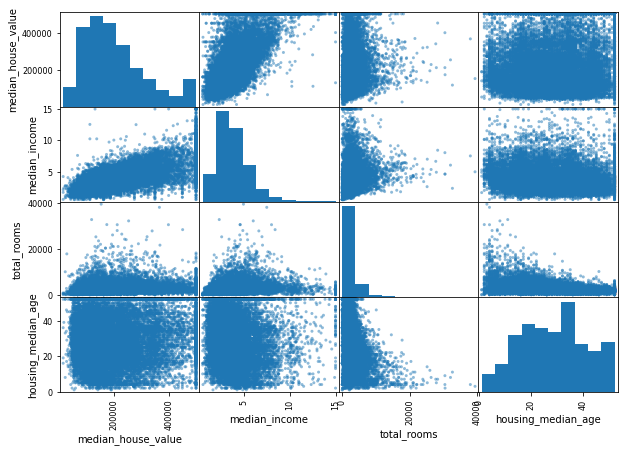

In [17]:
#Diagrama de correlacion 
#Definir lista llamada atributos con las siguientes variables (median_house_value, median_income, total_rooms, housing_median_age)
from pandas.plotting import scatter_matrix
atributos = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(df[atributos],figsize=(10,7))

In [18]:
#Nueva variable que indique el la capacidad de camas en una habitacion
#df['bed_rooms_per_room']=df['total_bedrooms']/df['total_rooms'] 

In [19]:
#Agregamos la nueva variable a mis atributos
atributos = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]#,"bed_rooms_per_room"]

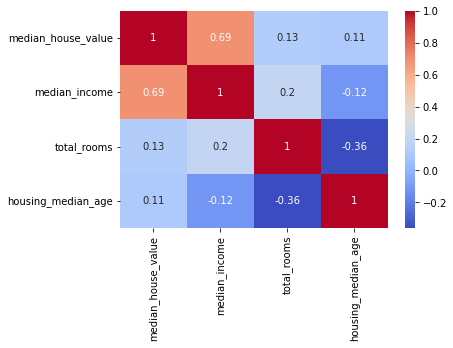

In [20]:
#Matriz de correlacion 
import seaborn as sn
corrMatrix=df[atributos].corr().round(2)
sn.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.show()

# Fin del Analisis exploratorio de los datos (EDA)

## Preparacion de los datos

In [21]:
#Revisar datos NAN
df.isnull().values.any()

True

In [22]:
len(df)

20635

In [23]:
df=df.dropna()

In [24]:
len(df)

20428

In [25]:
#Cuando tenemos campos "Categoricos" o "Cuaitativos" los podemos transformar

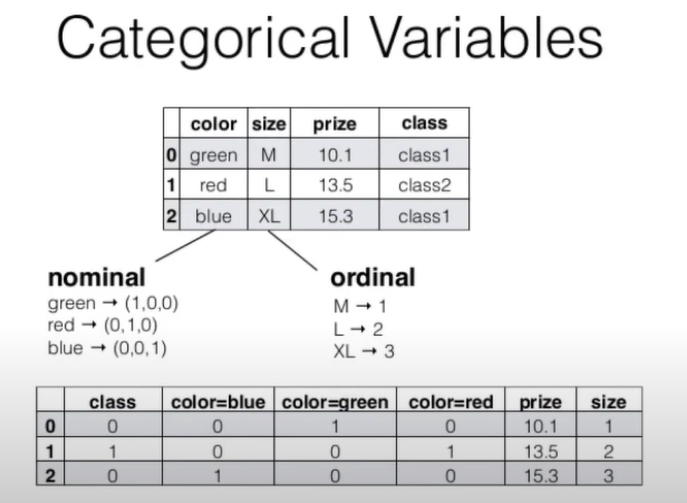


In [26]:
#Revisamos nuestro atributo categorico de nuestro data frame
df['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
Name: ocean_proximity, dtype: int64

# Codificamos el ejercicio en Nominal

In [27]:
#importamos la funcion onehotencoder
from sklearn.preprocessing import OneHotEncoder
nominal_codificador= OneHotEncoder(sparse=False)
nominal_codificador.fit_transform(df[['ocean_proximity']])

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [28]:
nominal_codificador.categories_

[array(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)]

In [29]:
# como ejemplo ordinal

#from sklearn.preprocessing import OrdinalEncoder
#O_codificador = OrdinalEncoder()
#O_codificador.fit_transform(df[['ocean_proximity']])
#O_codificador.categories_


#Funcion PIPELine
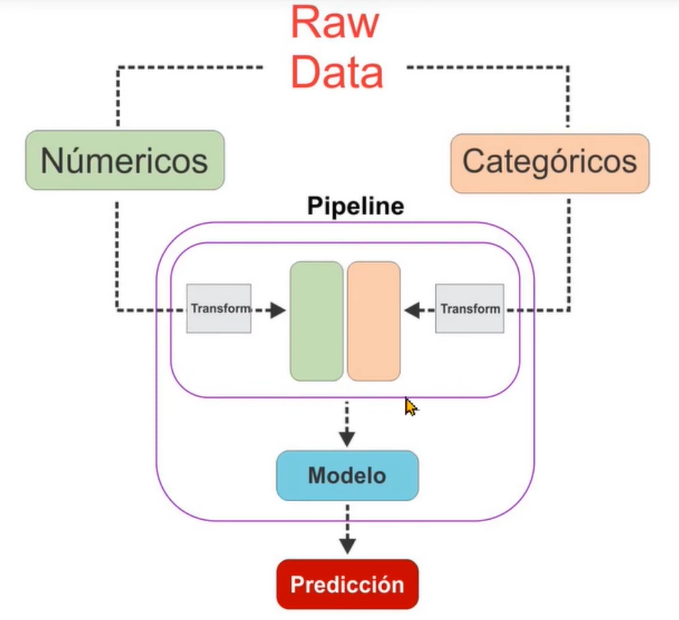

In [30]:
#pipeline nos permite juntar varias transformaciones secuanciales que se requieren ejecutar en un conjunto de datos
#Modulos Importantes
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [31]:
#Cramos las listas de variables numericas y categoricas en dos listas
numeric_list = ['median_income', 'total_rooms', 'housing_median_age']#, 'bedrooms_per_room']
categorical_list = ['ocean_proximity']

In [32]:
#creamos el pipeline de procesamiento para nuestros datos
numeric_transformer = Pipeline(steps=[ ('scaler', StandardScaler()) ])#Rescalamos los numeros
categorical_transformer = Pipeline(steps=[ ('onehot', OneHotEncoder()) ])#Codificamos a nominal (numeros)

### ColumnTransformer

ColumnTransformer Es una clase de ciclo leones que permite aplicar transformaciones de preparación de datos de forma selectiva.

Por ejemplo, permite aplicar una transformación específica o secuencia de transformaciones sólo a las columnas numéricas y 
una secuencia separada de transformaciones sola columnas categóricas.

Para usar columnstransformer, debe especificar una lista de transformadores. Cada transformador es una tupla de 3 elementos que define el nombre del transformador, la transformación aplicará a los índices de las columnas a los que aplicar por ejemplo (nombre, objeto, columnas)


In [33]:
#definir transformers 
transformer = ColumnTransformer([
    ('num',numeric_transformer,numeric_list),('cat',categorical_transformer,categorical_list)
])

División general de los datos

x: datos sin columna median_house_value
y: datos con la columna median_house_value

muestras de entrenamiento y prueba

X_train: este será el conjunto de entrenamiento
X_test: este será el grupo de prueba
y_train: este será el target para el grupo de entrenamiento
y_test: este será el target para el grupo de prueba


In [34]:
# Crear X (quitar median_house_value)
X = df.drop('median_house_value',axis=1)
#X = df.drop('bed_rooms_per_room',axis=1)

In [35]:
# Crear Y (median_house_value)
y = df['median_house_value']

In [36]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20428, dtype: float64

In [37]:
#Creamos las sub muestras para el entrenamiento
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)


In [38]:
#revisamos el tamaño de nuestras muestras


X_train.shape,X_test.shape,y_train.shape,y_test.shape

((14299, 9), (6129, 9), (14299,), (6129,))

In [39]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13422,-117.46,34.04,3.0,12870.0,2315.0,5820.0,1759.0,4.2429,INLAND
19644,-120.80,37.52,13.0,2920.0,481.0,1602.0,490.0,3.9286,INLAND
3431,-118.44,34.27,35.0,777.0,187.0,1022.0,186.0,3.4000,<1H OCEAN
8141,-118.11,33.82,36.0,1742.0,340.0,857.0,341.0,4.6875,<1H OCEAN
14763,-117.10,32.59,21.0,2350.0,667.0,1621.0,613.0,2.0734,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
10726,-117.81,33.64,16.0,2404.0,349.0,868.0,329.0,11.0138,<1H OCEAN
17990,-121.95,37.28,52.0,777.0,148.0,362.0,144.0,4.0208,<1H OCEAN
17958,-121.98,37.33,35.0,1907.0,326.0,912.0,313.0,5.9567,<1H OCEAN
1380,-122.09,38.00,6.0,10191.0,1882.0,4377.0,1789.0,5.2015,NEAR BAY


# Seleccion de modelo 

In [40]:
#Llamamos al modelo lineal
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

In [41]:
#PipeLine de la prediccion completa
model_linear_regression = Pipeline([
    ('transformer',transformer),
    ('linear_regression',linear_regression)
])

In [42]:
#iniciamos el ajuste del modelos con los datos de entrenamiento
model_linear_regression.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['median_income',
                                                   'total_rooms',
                                                   'housing_median_age']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('linear_regression', LinearRegression())])

In [43]:
#Probamos nuestro modelo
muestra_datos = X_test.iloc[:4]
model_linear_regression.predict(muestra_datos)

array([160759.25960223, 111683.23907865, 167392.03714285, 206973.0689226 ])

In [44]:
#Comparamos con los valores reales
list(y_test.iloc[:4])

[158300.0, 95200.0, 262500.0, 214200.0]

In [45]:
# Validamos la validacion cruza
#https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.model_selection import cross_val_score

lineal_score = cross_val_score( model_linear_regression , X, y,
                              scoring='neg_mean_squared_error', cv=20)
lineal_score

array([-6.81672524e+09, -3.79075378e+09, -3.24849818e+09, -4.20260342e+09,
       -9.10231873e+09, -9.01000994e+09, -6.11140828e+09, -3.73983916e+09,
       -1.06011016e+10, -4.48119648e+09, -6.14861882e+09, -3.63094069e+09,
       -2.40795519e+09, -3.55330819e+09, -6.48633344e+09, -1.19604310e+10,
       -7.82478738e+09, -5.77381001e+09, -3.01099314e+09, -2.96696347e+09])

In [46]:
#cambiamos el signo y sacamo raiz
linear_rmse_score = np.sqrt(-lineal_score)
linear_rmse_score

array([ 82563.46188321,  61569.09762076,  56995.59792732,  64827.48968616,
        95406.07281103,  94921.07215846,  78175.49665807,  61154.22439589,
       102961.651151  ,  66941.73947841,  78413.12911531,  60257.28744056,
        49070.92003673,  59609.63166266,  80537.77646976, 109363.75524749,
        88457.82823237,  75985.59079373,  54872.51717633,  54469.84000139])

In [47]:
#Definimos una funcion que nos calcule la media y la desviacin standar
def display_scores(scores):
    print('scores:', scores)
    print('mean:', scores.mean())
    print('standard desviation:', scores.std())

In [48]:
display_scores(linear_rmse_score)

scores: [ 82563.46188321  61569.09762076  56995.59792732  64827.48968616
  95406.07281103  94921.07215846  78175.49665807  61154.22439589
 102961.651151    66941.73947841  78413.12911531  60257.28744056
  49070.92003673  59609.63166266  80537.77646976 109363.75524749
  88457.82823237  75985.59079373  54872.51717633  54469.84000139]
mean: 73827.70899733147
standard desviation: 17114.297808321095


# DecisionTree

In [49]:
#Aplicar el modelo de arbol de desicion 
from sklearn.tree import DecisionTreeRegressor
#1.- Nombrar una variable para nuesto modelo
#2.- Definir el pipiline : transformaciones + modelo
#3.- Ajustar el modelo

#.1.-
tree_reg = DecisionTreeRegressor(random_state=42)
#.2.-
model_tree_reg = Pipeline(steps=[
    ('transformer',transformer),
    ('tree_reg',tree_reg)
])
#.3.-
model_linear_regression.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['median_income',
                                                   'total_rooms',
                                                   'housing_median_age']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('linear_regression', LinearRegression())])

In [50]:
#Evaluar modelo
tree_reg_scores= cross_val_score(model_tree_reg, X, y, 
                                scoring='neg_mean_squared_error', cv=20)
tree_rmse_scores = np.sqrt(-tree_reg_scores)
display_scores(tree_rmse_scores)

scores: [119232.05328353  86309.81567945  75942.62559198  86382.02808892
 118853.98381107 112873.7884874  108238.44972595  95244.25883038
 116293.42841018  94280.09907367 100561.17842467  86028.52358923
  69980.43482981  89712.96195222 110724.1432692  122734.7864167
 114366.45740053 104934.79214936  85639.01425636  80156.91871239]
mean: 98924.48709914926
standard desviation: 15609.900002582759


# Randon Forest

In [51]:
#Aplicar el modelo de bosques aleatoreos
from sklearn.ensemble import RandomForestRegressor
#nombrar variable del modelo
forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)

In [52]:
#Definimos el pipeline
model_forest_reg = Pipeline(steps=[
    ('transformer',transformer),
    ('tree_reg',forest_reg)
])



In [53]:
#.3.-
model_forest_reg.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['median_income',
                                                   'total_rooms',
                                                   'housing_median_age']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('tree_reg',
                 RandomForestRegressor(n_estimators=10, random_state=42))])

In [54]:
#Evaluar modelo
forest_reg_scores= cross_val_score(model_forest_reg, X, y, 
                                scoring='neg_mean_squared_error', cv=20)
forest_rmse_scores = np.sqrt(-forest_reg_scores)
display_scores(forest_rmse_scores)

scores: [ 89653.17892453  61713.95648547  60317.5903482   65957.81913171
  93125.79374405  94220.53793449  82638.22831545  68150.07492597
  99890.94553328  70985.26560224  84088.33740494  64648.95938015
  51197.52910767  62892.75787243  85352.06240185 105343.46983243
  89073.91623925  81441.42446666  61597.77326937  58127.5662635 ]
mean: 76520.85935918184
standard desviation: 15355.561291013055


In [55]:
#Evaluar modelos
list_model=['Linear Regression','DesicionTree','Random Forest']
lst_mean=[73827.70899733147,98924.48709914926,76520.85935918184]
lst_sd=[17114.297808321095,15609.900002582759,15355.561291013055]


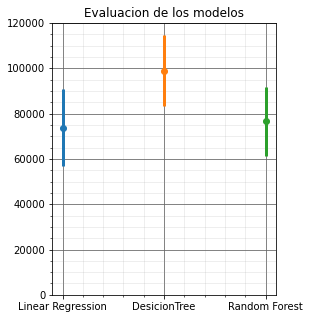

In [56]:
#Agregamos una grafica para comparar los modelos
plt.figure(figsize=(4,5))
for i in range(3):
    plt.errorbar(i,lst_mean[i], xerr=0, yerr=lst_sd[i], fmt='o',linewidth=3)
plt.xticks([0,1,2], list_model)
plt.title("Evaluacion de los modelos")
plt.ylim(0,120000)
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

#El randonforest es el mas optimo dado que tiene una desviacion mas baja

# Afinar (Fine Tune) del modelo RandonForest

In [57]:
# Utilizamos la funcion gridsearchCV para encontrar los valores mas optimos
from sklearn.model_selection import GridSearchCV

In [58]:
#Definimos posibles parametros
n_estimators=[3, 10, 30,50 , 80,100]
min_samples_split=[2,5,10,15]
max_depth=[10,20,30,40,50]

In [59]:
params={'tree_reg__n_estimators': n_estimators,
        'tree_reg__min_samples_split':min_samples_split,
        'tree_reg__max_depth':max_depth,
       }
print(params)

{'tree_reg__n_estimators': [3, 10, 30, 50, 80, 100], 'tree_reg__min_samples_split': [2, 5, 10, 15], 'tree_reg__max_depth': [10, 20, 30, 40, 50]}


In [60]:
#Buscar la mejor combinacion de cada parametro
grid = GridSearchCV( model_forest_reg, param_grid=params,
                    cv=10, scoring='neg_mean_squared_error',
                    n_jobs=-1, verbose=2)#Definimos cuanta CPU  (n_jobs -1 todos los disponibles)utilizaremos

In [61]:
model_forest_reg.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'transformer', 'tree_reg', 'transformer__n_jobs', 'transformer__remainder', 'transformer__sparse_threshold', 'transformer__transformer_weights', 'transformer__transformers', 'transformer__verbose', 'transformer__verbose_feature_names_out', 'transformer__num', 'transformer__cat', 'transformer__num__memory', 'transformer__num__steps', 'transformer__num__verbose', 'transformer__num__scaler', 'transformer__num__scaler__copy', 'transformer__num__scaler__with_mean', 'transformer__num__scaler__with_std', 'transformer__cat__memory', 'transformer__cat__steps', 'transformer__cat__verbose', 'transformer__cat__onehot', 'transformer__cat__onehot__categories', 'transformer__cat__onehot__drop', 'transformer__cat__onehot__dtype', 'transformer__cat__onehot__handle_unknown', 'transformer__cat__onehot__sparse', 'tree_reg__bootstrap', 'tree_reg__ccp_alpha', 'tree_reg__criterion', 'tree_reg__max_depth', 'tree_reg__max_features', 'tree_reg__max_leaf_nodes', 'tree_reg

In [62]:
#llevar a cabo los ajustes
grid.fit(X,y)


Fitting 10 folds for each of 120 candidates, totalling 1200 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['median_income',
                                                                          'total_rooms',
                                                                          'housing_median_age']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder())]),
                                                                  

In [63]:
#Mejor combinacion 
grid.best_params_

{'tree_reg__max_depth': 10,
 'tree_reg__min_samples_split': 15,
 'tree_reg__n_estimators': 80}

# Ajustamos el modelo con los mejores parametros encontrados

In [64]:
#Ajuste del modelo 
forest_reg=RandomForestRegressor(random_state= 42,
                                 max_depth=10,
                                 min_samples_split=15,
                                 n_estimators=80
)

In [65]:
#definimos el nuevo pipline
model_forest_reg=Pipeline( steps=[
    ('transformer',transformer),
    ('forest_reg',forest_reg)
])

In [66]:
#ajustar modelo
model_forest_reg.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['median_income',
                                                   'total_rooms',
                                                   'housing_median_age']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('forest_reg',
                 RandomForestRegressor(max_depth=10, min_samples_split=15,
                                       n_estimators=80, random_state=42))])

In [67]:
#Evaluacion 
forest_reg_scores= cross_val_score(model_forest_reg, X, y,
                                  scoring='neg_mean_squared_error',
                                  cv=10)

In [68]:
#Realizar cambio de signos
forest_rmse_scores = np.sqrt(-forest_reg_scores)

In [69]:
#Mostrar el resultado
display_scores(forest_rmse_scores)

scores: [84441.53502085 57550.41900788 90267.83221478 70076.07982002
 82103.73808379 69330.32251571 51985.58940067 93230.19669313
 80674.17856391 54558.75265256]
mean: 73421.86439733017
standard desviation: 14215.23630039977


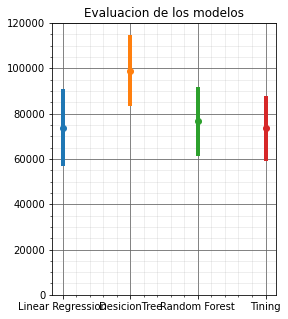

In [70]:
#Evaluar modelos
list_model=['Linear Regression','DesicionTree','Random Forest','Tining']
lst_mean=[73827.70899733147,98924.48709914926,76520.85935918184,73421.86439733017]
lst_sd=[17114.297808321095,15609.900002582759,15355.561291013055,14215.23630039977]

#Agregamos una grafica para comparar los modelos
plt.figure(figsize=(4,5))
for i in range(4):
    plt.errorbar(i,lst_mean[i], xerr=0, yerr=lst_sd[i], fmt='o',linewidth=4)
plt.xticks([0,1,2,3], list_model)
plt.title("Evaluacion de los modelos")
plt.ylim(0,120000)
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

# Extras

## Random Grid

In [71]:
#Definimos posibles parametros
n_estimators = [int(x) for x in np.linspace(start=10, stop=100, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 30, num=3)]
min_samples_split = [2,3,4,5,6]
min_samples_leaf = [1,2,3,4,5,6]

params_grid= {'forest_reg__n_estimators': n_estimators,
        'forest_reg__max_features': max_features,
        'forest_reg__max_depth':max_depth,
        'forest_reg__min_samples_split':min_samples_split,
        'forest_reg__min_samples_leaf':min_samples_leaf
}
print(params_grid)

{'forest_reg__n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'forest_reg__max_features': ['auto', 'sqrt'], 'forest_reg__max_depth': [3, 16, 30], 'forest_reg__min_samples_split': [2, 3, 4, 5, 6], 'forest_reg__min_samples_leaf': [1, 2, 3, 4, 5, 6]}


In [72]:
#Modulo RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

gridRandom_forest = RandomizedSearchCV (estimator= model_forest_reg,
                                        param_distributions=params_grid, n_iter=5, cv=10,
                                        random_state=42, n_jobs=-1,verbose=10
                                        )

In [73]:
model_forest_reg.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'transformer', 'forest_reg', 'transformer__n_jobs', 'transformer__remainder', 'transformer__sparse_threshold', 'transformer__transformer_weights', 'transformer__transformers', 'transformer__verbose', 'transformer__verbose_feature_names_out', 'transformer__num', 'transformer__cat', 'transformer__num__memory', 'transformer__num__steps', 'transformer__num__verbose', 'transformer__num__scaler', 'transformer__num__scaler__copy', 'transformer__num__scaler__with_mean', 'transformer__num__scaler__with_std', 'transformer__cat__memory', 'transformer__cat__steps', 'transformer__cat__verbose', 'transformer__cat__onehot', 'transformer__cat__onehot__categories', 'transformer__cat__onehot__drop', 'transformer__cat__onehot__dtype', 'transformer__cat__onehot__handle_unknown', 'transformer__cat__onehot__sparse', 'forest_reg__bootstrap', 'forest_reg__ccp_alpha', 'forest_reg__criterion', 'forest_reg__max_depth', 'forest_reg__max_features', 'forest_reg__max_leaf_nod

In [74]:
gridRandom_forest.fit(X,y)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['median_income',
                                                                                'total_rooms',
                                                                                'housing_median_age']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder())]),


In [75]:
gridRandom_forest.best_params_

{'forest_reg__n_estimators': 70,
 'forest_reg__min_samples_split': 4,
 'forest_reg__min_samples_leaf': 5,
 'forest_reg__max_features': 'sqrt',
 'forest_reg__max_depth': 16}

# Ranking de parametros

In [83]:
#Puntaje de las variables
#(gridRandom_forest.best_estimator_.named_step["Tining"].feature_importances_).tolist()
ranking = gridRandom_forest.best_estimator_.named_steps["forest_reg"].feature_importances_.tolist()
ranking

[0.5682086800431234,
 0.09132017534669921,
 0.0898808054271663,
 0.030745961226537697,
 0.18848220457209325,
 0.014527217615063148,
 0.01683495576931685]

In [84]:
sum(ranking)

0.9999999999999999

In [85]:
numeric_list

['median_income', 'total_rooms', 'housing_median_age']

In [86]:
categorical_list_ocean_proximity = Nominal_codificador.categories_[0].tolist()

NameError: name 'Nominal_codificador' is not defined